**Recycling robot example** (from Sutton, page 42)
References:
  - Gym documentation: https://gym.openai.com/

  

In [28]:
from gym.envs.toy_text import discrete
#from gym import spaces
import random
import matplotlib.pyplot as plt
import numpy as np

##### TODO: Describir coloquialmente el modelo de sutton
Dos estados: high y low
Tres acciones: search, wait, recharge

##### TODO: Explicar lo básico de GYM

# Considere el modelo del robot de reciclaje descríto en Sutton Example 3.2

<img src="img/example3.2-1.png" width="500" align="left">

<img src="img/example3.2-2.png" width="500" align="left">

In [29]:
states = ["high", "low"]
actions = ["wait", "search", "recharge"]

P = {}

P[0] = {}
P[1] = {}

alpha = 0.8
beta = 0.1
r_wait = 0.5
r_search = 2.0

# definimos un ambiente discreto con las transiciones según el gráfico
def generar_ambiente(alpha=alpha, beta=beta, r_wait=r_wait, r_search=r_search):
    P[0][0] = [(1.0, 0, r_wait, False)]
    P[0][1] = [(alpha, 0, r_search, False),
               (1-alpha, 1, r_search, False)]
    P[0][2] = [(1,0,0,False)]

    P[1][0] = [(1.0, 1, r_wait, False)]
    P[1][1] = [(beta, 1, r_search, False), 
               (1-beta, 0, -3.0, False)]
    P[1][2] = [(1.0, 0, 0.0, False)]
    env = discrete.DiscreteEnv(2, 3, P, [0.0, 1.0])
    return(env)
env = generar_ambiente()

c:\users\jack\gym\gym\__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


# Implemente la estrategia random para veinte episodios. 


Definir una acción aleatoria y ver que reward produce

In [30]:
def randomExperiment(env):
    print("Obs\tDone\tReward\tC.Reward\tAction")
    verbose=True
    history = []
    rewardAcum = 0
    state=1 # < starting state
    for i in range(50):
        #action = env.action_space.sample()
        if state == 1:
            action = np.random.choice([0,1,2])
        else:
            action = np.random.choice([0,1])
        state, reward, done, info = env.step(action)
        if done:
            observation = env.reset()
        rewardAcum += reward
        elemHist = np.array([i, reward, rewardAcum])
        history.append(elemHist)
        if verbose:
            print(state,"\t", done,"\t", reward, "\t", "%.4f" % rewardAcum, "\t", action)
        env.close()
    return history

In [31]:
env = generar_ambiente()
data = randomExperiment(env)

Obs	Done	Reward	C.Reward	Action
0 	 False 	 0.0 	 0.0000 	 2
0 	 False 	 2.0 	 2.0000 	 1
0 	 False 	 0.5 	 2.5000 	 0
0 	 False 	 0.5 	 3.0000 	 0
0 	 False 	 0.5 	 3.5000 	 0
0 	 False 	 2.0 	 5.5000 	 1
1 	 False 	 2.0 	 7.5000 	 1
0 	 False 	 -3.0 	 4.5000 	 1
0 	 False 	 0.5 	 5.0000 	 0
0 	 False 	 0.5 	 5.5000 	 0
0 	 False 	 0.5 	 6.0000 	 0
1 	 False 	 2.0 	 8.0000 	 1
0 	 False 	 -3.0 	 5.0000 	 1
0 	 False 	 2.0 	 7.0000 	 1
0 	 False 	 0.5 	 7.5000 	 0
0 	 False 	 0.5 	 8.0000 	 0
0 	 False 	 0.5 	 8.5000 	 0
0 	 False 	 2.0 	 10.5000 	 1
0 	 False 	 0.5 	 11.0000 	 0
0 	 False 	 0.5 	 11.5000 	 0
0 	 False 	 2.0 	 13.5000 	 1
1 	 False 	 2.0 	 15.5000 	 1
0 	 False 	 0.0 	 15.5000 	 2
0 	 False 	 2.0 	 17.5000 	 1
0 	 False 	 2.0 	 19.5000 	 1
0 	 False 	 0.5 	 20.0000 	 0
0 	 False 	 2.0 	 22.0000 	 1
0 	 False 	 0.5 	 22.5000 	 0
0 	 False 	 2.0 	 24.5000 	 1
0 	 False 	 0.5 	 25.0000 	 0
0 	 False 	 0.5 	 25.5000 	 0
0 	 False 	 0.5 	 26.0000 	 0
0 	 False 	 0.5 	 26.50

c:\users\jack\gym\gym\__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


# Grafique la recompensa acumulada

In [32]:
# history data to numpy,
data = np.array(data)
data[0:6]

array([[0. , 0. , 0. ],
       [1. , 2. , 2. ],
       [2. , 0.5, 2.5],
       [3. , 0.5, 3. ],
       [4. , 0.5, 3.5],
       [5. , 2. , 5.5]])

In [33]:
# so I can do this
data[0:6, 1]

array([0. , 2. , 0.5, 0.5, 0.5, 2. ])

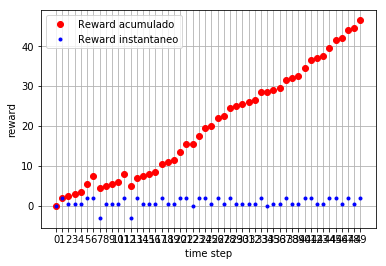

In [34]:
plt.grid()
plt.xlabel("time step")
plt.ylabel("reward")
plt.xticks(np.arange(0,len(data),1))
plt.plot(data[:,0], data[:,2], 'ro', label='Reward acumulado')
plt.plot(data[:,0], data[:,1], 'b.', label='Reward instantaneo')

plt.legend()

# Calcule de forma teórica V, la value function optima para cada estado

<span style="color:red">**PREGUNTAR v !!!**</span>

    #x: actual state
    #y's: next states

    V(x) = reward + gamma (sum_y( p(y|a,x) * V(y) ))

$V^*(x) = R + \gamma * \sum_{y \in S'}\ p(y\ |\ a,x) * V(y)$

# Implemente el algoritmo de iteración de valor (Value iteration)

<img src="img/value-iteration-4.4.png" width="500" align="left">

  Evaluate the optimal value function given a full description of the environment dynamics
  
  

```
 Args:

        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
  
  Returns:
        Vector of length env.nS representing the value function.
```


  
   

In [83]:
# En cada estado, quiero calcular la value function optima;
# uso ecuacion de bellman, tomando el reward instantaneo y
# estimando futuros posibles rewards a partir de las acciones.
def valueIteration(env, theta=0.1, gamma=0.9, verbose=False):
    if verbose:
        print("epoch\tvalue V")
    update=float('inf')
    V = np.zeros(env.nS)
    epoch=0
    while(update > theta):
        # bellman eq; for each state:
        for s in range(env.nS):
            vPrev = V[s]
            maxReward = -float('inf')
            for a in range(env.nA):
                sumFutureRewards = 0
                for prob, next_state, reward, done in env.P[s][a]:
                    # sum rewards over all possible next states
                    # (an action may result in many outcomes)
                    sumFutureRewards += prob * (reward + gamma*V[next_state])
                # selecting max reward from all possible actions 'a' at that state 's'
                if(maxReward < sumFutureRewards):
                    maxReward = sumFutureRewards
            # updating value function
            V[s] = maxReward
            #we stop when update < theta
            update = abs(V[s] - vPrev)
        epoch += 1
        if verbose:
            print(epoch, ":", V)
    return V

In [84]:
def testValueIteration():
    env = generar_ambiente()
    print("Value function optima:")
    print("V = [state-1:    state-2:   ]")
    print("V =", valueIteration(env))
testValueIteration()

Value function optima:
V = [state-1:    state-2:   ]
V = [16.21487099 14.59338389]


c:\users\jack\gym\gym\__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


# Implemente el algoritmo de policy iteration

Definir primero una funcion de evaluación de politica,

```
Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
        
```

Despues una funcion de optimisacion de la politica:


```
 Policy Improvement Algorithm. Iteratively evaluates and improves a policy
    until an optimal policy is found.
    
    Args:
        env: The OpenAI envrionment.
        policy_eval_fn: Policy Evaluation function that takes 3 arguments:
            policy, env, discount_factor.
        discount_factor: gamma discount factor.
        
    Returns:
        A tuple (policy, V). 
        policy is the optimal policy, a matrix of shape [S, A] where each state s
        contains a valid probability distribution over actions.
        V is the value function for the optimal policy.
        
```





<img src="img/policy-evaluation-4.1.png" width="500" align="left">

<img src="img/value-vs-policy.png" width="500" align="left">

In [64]:
# Policy Evaluation 
# en cada estado, quiero calcular la value function PARA UNA POLICY PI;
# uso ecuacion de bellman, tomando el reward instantaneo y
# estimando futuros posibles rewards a partir de las acciones, que son elegidas
# siguiendo la policy pi.
def policyEvaluation(env, policy, theta=0.1, gamma=0.9, verbose=False):
    if verbose:
        print("epoch\tvalue V^pi_i")
    update=float('inf')
    Vpi = np.zeros(env.nS)
    epoch=0
    while(update > theta):
        # bellman eq; for each state:
        for s in range(env.nS):
            vPrev = Vpi[s]
            piReward = -float('inf')
            piReward = 0
            # the policy is deterministic, so it always choose the same action
            a = np.random.choice([0,1,2], p=policy[s])
            for prob, next_state, reward, done in env.P[s][a]:
                # sums possible rewards ONLY OVER policy's actions
                piReward += prob * (reward + gamma*Vpi[next_state])
            # this action at this state costs/reward us 'piReward'
            Vpi[s] = piReward
            update = abs(Vpi[s] - vPrev)
        epoch += 1
        if verbose:
            print(epoch, ":", Vpi)
    return Vpi

In [65]:
def testPoliEval():
    env = generar_ambiente()
    # discrete random policy
    policy=np.zeros((env.nS, env.nA))#[S,A]
    policy[0][np.random.choice([0,1])] = 1
    policy[1][np.random.choice([0,1,2])] = 1
    # run policy evaluation and returns its value 
    return policyEvaluation(env, policy, verbose=True)

In [66]:
# Policy Evaluation test with random policy
print(testPoliEval())

epoch	value V^pi_i
1 : [2.  0.5]
2 : [3.53 0.95]
3 : [4.7126 1.355 ]
4 : [5.636972 1.7195  ]
5 : [6.36812984 2.04755   ]
6 : [6.95361248 2.342795  ]
7 : [7.42830409 2.6085155 ]
8 : [7.81791173 2.84766395]
9 : [8.14147596 3.06289756]
10 : [8.41318425 3.2566078 ]
11 : [8.64368206 3.43094702]
12 : [8.84102155 3.58785232]
13 : [9.01134893 3.72906709]
14 : [9.15940331 3.85616038]
15 : [9.28887925 3.97054434]
16 : [9.40269104 4.07348991]
17 : [9.50316573 4.16614092]
[9.50316573 4.16614092]


c:\users\jack\gym\gym\__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


<img src="img/policy-iteration-4.3.png" width="500" align="left">

<img src="img/value-iteration-4.4.png" width="500" align="left">

In [89]:
def policyImprovement(env, policy, gamma=0.9):
    policyStable = False
    theta=0.1
    V = policyEvaluation(env, policy, gamma=0.9, verbose=False)
    update=float('inf')
    while(not policyStable):
        policyStable = True
        for s in range(env.nS):
            vPrev = V
            oldA = np.array(policy[s])
            maxReward = -float('inf')
            maxAction = 0;
            for a in range(env.nA):
                sumFutureRewards = 0
                for prob, next_state, reward, done in env.P[s][a]:
                    # we weight our future reward estimation with our
                    # estimated value function
                    sumFutureRewards += prob * (reward + gamma*V[next_state])
                # me quedo con el mayor reward entre todas las actions 'a' posibles
                # en el estado s
                if(maxReward < sumFutureRewards):
                    maxReward = sumFutureRewards
                    maxAction = a
            oneHot = np.zeros(3)
            oneHot[maxAction] = 1
            policy[s] = oneHot
            if not np.array_equal(oldA, policy[s]):
                policyStable = False
        if policyStable:
            return (policy, V)
        else:
            V = policyEvaluation(env, policy, gamma=0.9, verbose=False)
            #como lo comparo? que mido?
        #update = np.mean(abs(V[s] - vPrev))
        #print(update)

In [90]:
def testPolicyImprovement():
    env = generar_ambiente()
    # discrete random policy
    policy=np.zeros((env.nS, env.nA))#[S,A]
    policy[0][np.random.choice([0,1])] = 1
    policy[1][np.random.choice([0,1,2])] = 1
    # run policy evaluation and returns its value
    print("Policy to improve:")
    print(policy)
    return policyImprovement(env, policy=policy)

In [91]:
policy, V = testPolicyImprovement()
print("Optimal policy: \n",policy,"\nValue: \n",V)

Policy to improve:
[[0. 1. 0.]
 [1. 0. 0.]]
Optimal policy: 
 [[0. 1. 0.]
 [0. 0. 1.]] 
Value: 
 [16.21487099 14.59338389]


c:\users\jack\gym\gym\__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


# Utilizando los 3 algoritmos, realice los experimentos para las siguientes configuraciones del ambiente.

In [92]:
exp1 = generar_ambiente(alpha=0.9, beta=0.9, r_search=3, r_wait=2)
exp2 = generar_ambiente(alpha=0.8, beta=0.5, r_search=3, r_wait=2)
exp3 = generar_ambiente(alpha=0.5, beta=0.5, r_search=3, r_wait=2)
exp4 = generar_ambiente(alpha=0.9, beta=0.6, r_search=1, r_wait=0.9)
exp5 = generar_ambiente(alpha=0.9, beta=0.6, r_search=1, r_wait=0.5)


c:\users\jack\gym\gym\__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


# Utilizando el grafico de recompensa, compare las estrategias óptimas generadas con los experimentos anteriores contra la estrategia al azar.

In [93]:
env = generar_ambiente(alpha=0.9, beta=0.9, r_search=3, r_wait=2)
valueIteration(env=exp3, verbose=True)

epoch	value V
1 : [3.  2.7]
2 : [5.673  5.1057]
3 : [8.054643   7.26053487]
4 : [10.17770897  9.19702705]
5 : [12.0716767  10.93604281]
6 : [13.76230198 12.49680186]
7 : [15.27217677 13.89690541]
8 : [16.62118467 15.15240001]
9 : [17.82687558 16.27786281]
10 : [18.90477688 17.28649879]
11 : [19.86865416 18.1902429 ]
12 : [20.73073173 18.9998626 ]
13 : [21.50188034 19.72505794]
14 : [22.19177829 20.37455698]
15 : [22.80905054 20.9562057 ]
16 : [23.36138945 21.47705167]
17 : [23.8556601  21.94342126]
18 : [24.2979926  22.36099055]
19 : [24.69386315 22.73485003]
20 : [25.04816566 23.06956344]
21 : [25.36527489 23.36922112]
22 : [25.64910256 23.63748834]
23 : [25.90314703 23.87764879]
24 : [26.13053748 24.09264389]
25 : [26.33407331 24.28510815]
26 : [26.51625912 24.45740092]
27 : [26.67933597 24.61163498]
28 : [26.82530928 24.74970217]
29 : [26.95597371 24.87329639]
30 : [27.07293538 24.98393426]
31 : [27.17763174 25.08297361]


c:\users\jack\gym\gym\__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


array([27.17763174, 25.08297361])

In [94]:
valueIteration(exp1, verbose=True)

epoch	value V
1 : [3.  2.7]
2 : [5.673  5.1057]
3 : [8.054643   7.26053487]
4 : [10.17770897  9.19702705]
5 : [12.0716767  10.93604281]
6 : [13.76230198 12.49680186]
7 : [15.27217677 13.89690541]
8 : [16.62118467 15.15240001]
9 : [17.82687558 16.27786281]
10 : [18.90477688 17.28649879]
11 : [19.86865416 18.1902429 ]
12 : [20.73073173 18.9998626 ]
13 : [21.50188034 19.72505794]
14 : [22.19177829 20.37455698]
15 : [22.80905054 20.9562057 ]
16 : [23.36138945 21.47705167]
17 : [23.8556601  21.94342126]
18 : [24.2979926  22.36099055]
19 : [24.69386315 22.73485003]
20 : [25.04816566 23.06956344]
21 : [25.36527489 23.36922112]
22 : [25.64910256 23.63748834]
23 : [25.90314703 23.87764879]
24 : [26.13053748 24.09264389]
25 : [26.33407331 24.28510815]
26 : [26.51625912 24.45740092]
27 : [26.67933597 24.61163498]
28 : [26.82530928 24.74970217]
29 : [26.95597371 24.87329639]
30 : [27.07293538 24.98393426]
31 : [27.17763174 25.08297361]


array([27.17763174, 25.08297361])

In [95]:
valueIteration(exp2, verbose=True)

epoch	value V
1 : [3.  2.7]
2 : [5.673  5.1057]
3 : [8.054643   7.26053487]
4 : [10.17770897  9.19702705]
5 : [12.0716767  10.93604281]
6 : [13.76230198 12.49680186]
7 : [15.27217677 13.89690541]
8 : [16.62118467 15.15240001]
9 : [17.82687558 16.27786281]
10 : [18.90477688 17.28649879]
11 : [19.86865416 18.1902429 ]
12 : [20.73073173 18.9998626 ]
13 : [21.50188034 19.72505794]
14 : [22.19177829 20.37455698]
15 : [22.80905054 20.9562057 ]
16 : [23.36138945 21.47705167]
17 : [23.8556601  21.94342126]
18 : [24.2979926  22.36099055]
19 : [24.69386315 22.73485003]
20 : [25.04816566 23.06956344]
21 : [25.36527489 23.36922112]
22 : [25.64910256 23.63748834]
23 : [25.90314703 23.87764879]
24 : [26.13053748 24.09264389]
25 : [26.33407331 24.28510815]
26 : [26.51625912 24.45740092]
27 : [26.67933597 24.61163498]
28 : [26.82530928 24.74970217]
29 : [26.95597371 24.87329639]
30 : [27.07293538 24.98393426]
31 : [27.17763174 25.08297361]


array([27.17763174, 25.08297361])

In [96]:
valueIteration(exp3, verbose=True)

epoch	value V
1 : [3.  2.7]
2 : [5.673  5.1057]
3 : [8.054643   7.26053487]
4 : [10.17770897  9.19702705]
5 : [12.0716767  10.93604281]
6 : [13.76230198 12.49680186]
7 : [15.27217677 13.89690541]
8 : [16.62118467 15.15240001]
9 : [17.82687558 16.27786281]
10 : [18.90477688 17.28649879]
11 : [19.86865416 18.1902429 ]
12 : [20.73073173 18.9998626 ]
13 : [21.50188034 19.72505794]
14 : [22.19177829 20.37455698]
15 : [22.80905054 20.9562057 ]
16 : [23.36138945 21.47705167]
17 : [23.8556601  21.94342126]
18 : [24.2979926  22.36099055]
19 : [24.69386315 22.73485003]
20 : [25.04816566 23.06956344]
21 : [25.36527489 23.36922112]
22 : [25.64910256 23.63748834]
23 : [25.90314703 23.87764879]
24 : [26.13053748 24.09264389]
25 : [26.33407331 24.28510815]
26 : [26.51625912 24.45740092]
27 : [26.67933597 24.61163498]
28 : [26.82530928 24.74970217]
29 : [26.95597371 24.87329639]
30 : [27.07293538 24.98393426]
31 : [27.17763174 25.08297361]


array([27.17763174, 25.08297361])

In [97]:
valueIteration(exp4, verbose=True)

epoch	value V
1 : [3.  2.7]
2 : [5.673  5.1057]
3 : [8.054643   7.26053487]
4 : [10.17770897  9.19702705]
5 : [12.0716767  10.93604281]
6 : [13.76230198 12.49680186]
7 : [15.27217677 13.89690541]
8 : [16.62118467 15.15240001]
9 : [17.82687558 16.27786281]
10 : [18.90477688 17.28649879]
11 : [19.86865416 18.1902429 ]
12 : [20.73073173 18.9998626 ]
13 : [21.50188034 19.72505794]
14 : [22.19177829 20.37455698]
15 : [22.80905054 20.9562057 ]
16 : [23.36138945 21.47705167]
17 : [23.8556601  21.94342126]
18 : [24.2979926  22.36099055]
19 : [24.69386315 22.73485003]
20 : [25.04816566 23.06956344]
21 : [25.36527489 23.36922112]
22 : [25.64910256 23.63748834]
23 : [25.90314703 23.87764879]
24 : [26.13053748 24.09264389]
25 : [26.33407331 24.28510815]
26 : [26.51625912 24.45740092]
27 : [26.67933597 24.61163498]
28 : [26.82530928 24.74970217]
29 : [26.95597371 24.87329639]
30 : [27.07293538 24.98393426]
31 : [27.17763174 25.08297361]


array([27.17763174, 25.08297361])

In [98]:
valueIteration(exp5, verbose=True)

epoch	value V
1 : [3.  2.7]
2 : [5.673  5.1057]
3 : [8.054643   7.26053487]
4 : [10.17770897  9.19702705]
5 : [12.0716767  10.93604281]
6 : [13.76230198 12.49680186]
7 : [15.27217677 13.89690541]
8 : [16.62118467 15.15240001]
9 : [17.82687558 16.27786281]
10 : [18.90477688 17.28649879]
11 : [19.86865416 18.1902429 ]
12 : [20.73073173 18.9998626 ]
13 : [21.50188034 19.72505794]
14 : [22.19177829 20.37455698]
15 : [22.80905054 20.9562057 ]
16 : [23.36138945 21.47705167]
17 : [23.8556601  21.94342126]
18 : [24.2979926  22.36099055]
19 : [24.69386315 22.73485003]
20 : [25.04816566 23.06956344]
21 : [25.36527489 23.36922112]
22 : [25.64910256 23.63748834]
23 : [25.90314703 23.87764879]
24 : [26.13053748 24.09264389]
25 : [26.33407331 24.28510815]
26 : [26.51625912 24.45740092]
27 : [26.67933597 24.61163498]
28 : [26.82530928 24.74970217]
29 : [26.95597371 24.87329639]
30 : [27.07293538 24.98393426]
31 : [27.17763174 25.08297361]


array([27.17763174, 25.08297361])

In [100]:
valueIteration(exp1)

array([27.17763174, 25.08297361])

In [106]:
from gym import spaces
exp2 = generar_ambiente(alpha=0.8, beta=0.5, r_search=3, r_wait=2)
valueIteration(exp2)

c:\users\jack\gym\gym\__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


array([24.66801105, 22.20120994])